In [141]:
# for data manipulation
import pandas as pd
import numpy as np
import math

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# for regression 
import statsmodels.api as sm

# for preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

from datetime import datetime
from dateutil import parser
import tldextract
import re

In [142]:
#load dataset
df = pd.read_csv('C:\\Users\\alexr\\Desktop\\   \\Work\\Data Science\\In Use\\test\\test.csv',on_bad_lines='skip')

C:\Users\alexr\AppData\Local\Temp\ipykernel_19776\2150769945.py:2: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('C:\\Users\\alexr\\Desktop\\   \\Work\\Data Science\\In Use\\test\\test.csv',on_bad_lines='skip')


In [143]:
pd.set_option('display.max_columns', None)
df.head()

,hash_content_id,hash_play_id,hash_visit_id,hash_watcher_id,hash_film_id,hash_event_id,is_login,playback_location,platform,play_time,end_time,referrer,average_bitrate,bitrate_range,total_bytes,buffer_duration,referrer_group,completed,utm_source,utm_medium,utm_campaign,player_name,has_ad,flash_version,os_name,os_version,browser_name,browser_version,app_name,autoplay,is_premium,app_version,city,play_duration,content_type,stream_type,title,category_name,film_title,season_name,genre_name
0,0096dafb1049ee942e8e7cbad5abf4a46dc92e3995caac...,0162f124f5bd61592d9bca6aaa3b1b6097a00b62ef33c9...,27dfffe2bb74f8767caeb64ac4c92e9eaf4b11a28ef7e1...,e7c2138fd9d4047356066a01de46fc22ee9955a6fd6679...,NaN,c81bd64a212d3b5cb227499a6b4a3dc607748ae5133e48...,False,embed,web-mobile,2020-02-02T10:21:20.000Z,2020-02-02T10:21:20.000Z,https://m.liputan6.com/bola/read/4169085/marc-...,300000.0,200-500,0,0.000,liputan6,False,NaN,NaN,NaN,videojs,True,"0,0,0",Android,9,Chrome Mobile WebView,62.0.3202,vidio,False,False,NaN,NaN,0,vod,NaN,Kiprah Eks Pemain Juventus yang Dikaitkan deng...,Sports,NaN,NaN,NaN
1,01ddda2f8667719625bd0afa58537fd95a166c93233b8b...,5f6c722782c919a9cb6254e94086462a6c34794dc741b6...,90b2b454e70a2c13cf9e8ca987d7c4f914c7d819532c5d...,d265ea2b8df584c51de3b2c6aebb6a0415384a18d1a148...,NaN,90a514e451e400c4c32ac42815920a66c500c1c2ea347d...,False,embed,web-mobile,2020-02-02T12:17:33.000Z,2020-02-02T12:17:53.000Z,https://m.bola.net/italia/lautaro-martinez-abs...,600.0,0-200,750,0.000,bolanet,False,NaN,NaN,NaN,videojs,True,"0,0,0",Android,9,Chrome Mobile,79.0.3945,vidio,False,False,NaN,NaN,19,vod,NaN,"Pindah ke Inter Milan, Christian Eriksen Jadi ...",Sports,NaN,NaN,NaN
2,01ddda2f8667719625bd0afa58537fd95a166c93233b8b...,66c32aa6aa6a63f7d85d1bd1b8b6b295477c88794888d8...,f79cab25855841a83e6aa01eccbf3d167491a868977b77...,d2585a4b468b7cdbebc053ffc5b49cebd58d6e738bccdd...,NaN,c278001db02102ece22d428b9235332856cba4754b63a0...,False,embed,web-mobile,2020-02-02T01:26:42.000Z,2020-02-02T01:27:07.000Z,https://m.bola.net/italia/lautaro-martinez-abs...,300000.0,200-500,900000,0.000,bolanet,False,NaN,NaN,NaN,videojs,True,"0,0,0",Android,9,Samsung Internet,10.2,vidio,False,False,NaN,NaN,24,vod,NaN,"Pindah ke Inter Milan, Christian Eriksen Jadi ...",Sports,NaN,NaN,NaN
3,01e34cb2658d0461f220bda493cb38427eef7de1e23e6e...,38976454aec1c7ff4ca0a35df8821db29227443352e705...,f23800acfeede429803cb2a1380ca7652067fb35d079a8...,bba3183af4f6c29d97dce6ee557561e3feef31d19ae9ab...,NaN,ed0731e9861306e6e26cf3cfb5a43da6b0e19af3ff3ff5...,False,embed,web-mobile,2020-02-02T13:45:05.000Z,2020-02-02T13:45:05.000Z,https://m.liputan6.com/amp/4169313/jadwal-liga...,600.0,0-200,750,0.000,liputan6,False,NaN,NaN,NaN,videojs,True,"0,0,0",Android,8.1.0,Chrome Mobile WebView,79.0.3945,vidio,False,False,NaN,NaN,0,vod,NaN,5 Kelebihan Mikel Arteta Menurut Pep Guardiola,Sports,NaN,NaN,NaN
4,01e34cb2658d0461f220bda493cb38427eef7de1e23e6e...,4b4ee4aa4c37519250aa6efbd78e789b40d976474a1c37...,b058895b6fce58bcfbd72bfd7a3dfa4ae01d094e21c976...,317ecdb779c3ba5bdc1818405aaafebcef35e9582c42e5...,NaN,3679f65950032d6bff1323df5b29292adad99918d616ae...,False,embed,web-desktop,2020-02-02T13:23:40.000Z,2020-02-02T13:23:44.000Z,https://www.liputan6.com/bola/read/4169313/jad...,700.0,0-200,875,27.101,liputan6,False,NaN,NaN,NaN,videojs,True,"0,0,0",Windows,7,Chrome,79.0.3945,vidio,True,False,NaN,NaN,4,vod,NaN,5 Kelebihan Mikel Arteta Menurut Pep Guardiola,Sports,NaN,NaN,NaN


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106811 entries, 0 to 106810
Data columns (total 41 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   hash_content_id    106811 non-null  object 
 1   hash_play_id       106811 non-null  object 
 2   hash_visit_id      106811 non-null  object 
 3   hash_watcher_id    106811 non-null  object 
 4   hash_film_id       5818 non-null    object 
 5   hash_event_id      106811 non-null  object 
 6   is_login           106811 non-null  bool   
 7   playback_location  106811 non-null  object 
 8   platform           106811 non-null  object 
 9   play_time          106811 non-null  object 
 10  end_time           106811 non-null  object 
 11  referrer           101050 non-null  object 
 12  average_bitrate    101865 non-null  float64
 13  bitrate_range      106811 non-null  object 
 14  total_bytes        106811 non-null  int64  
 15  buffer_duration    106811 non-null  float64
 16  re

In [145]:
cat = [feature for feature in df.columns if len(df[feature].unique())<500]

#cat_df = pd.DataFrame(cat)

cat_df = df[cat]

In [146]:
for feature in cat:
    print('{} = {} cat'.format(feature,len(df[feature].unique())))

hash_film_id = 373 cat
is_login = 2 cat
playback_location = 2 cat
platform = 7 cat
average_bitrate = 240 cat
bitrate_range = 3 cat
referrer_group = 16 cat
completed = 3 cat
utm_source = 7 cat
utm_medium = 7 cat
utm_campaign = 7 cat
player_name = 4 cat
has_ad = 2 cat
flash_version = 45 cat
os_name = 13 cat
os_version = 224 cat
browser_name = 44 cat
app_name = 3 cat
autoplay = 3 cat
is_premium = 2 cat
app_version = 114 cat
city = 1 cat
content_type = 3 cat
stream_type = 3 cat
category_name = 16 cat
film_title = 371 cat
season_name = 120 cat
genre_name = 244 cat


In [147]:
#check categorical value
for i in cat_df.columns:
    print(i.upper(),":",cat_df[i].unique())

HASH_FILM_ID : [nan '28955b1fb53203e2ff246fd2d4c3e148d4666a617469cdcc86060985682ab4bc'
 '200dd69b70a88134b3a939de5f0b10c44a1675344329b9d9a5ad6b7342f978b2'
 'c49b60838c5c6ddf34806b6b3f56b51516842cb1cead54a903f55d9c6d73c76d'
 'c0cc3b36d8f848d56fbf95b8259dd6f3bf80707e436233a6bfc2667b49e28c8a'
 'ddfe0e8d462af661f81db36589c39882dc0f2330785b5d80cd34f2f520ad618f'
 'b98880883fd8d975260f1807fa46a5156fcc4cc82bf6d657a417d8bb4e42cd55'
 'bda584056eb9957d6c681e00079eff36fec289e2a0432a4221b95438dfef5ca4'
 '1bee34b6262a7777362f96e3dd5635764e820f97bab9772f492397774a38d74a'
 'a73ab888363736220eb589458721088241ee10059b1f5898a13fe9c2e14fcd8c'
 '6ea2fdb3399f4d2e806beb01e9a3371bd622bed6a409acf3151818d738c370ec'
 '48a1706eca5ee6148f748ca91a0f7db6ebcf59943532044a7bf60bbe44e5b1d2'
 '33eb7e4ae43f9873d9c84c0f07b055946b24a71ca27daa60acbbf95b44c7c5e0'
 '7a9b1b9dd2e433fc1fc962c38ad571bf1ebb49cb365bfdfb2c36d3f059d6fdd5'
 '728bf33aab1d32d4dca8fcc6a020d8baeb6b9910104541aa68c2d408154734fc'
 '5a39cadd1b007093db50744797c

In [148]:
#Missing values
# Calculate the percentage of missing values in each column
a = df.isnull().sum().sort_values(ascending=False) * 100 / len(df)

# Iterate over each column and its corresponding missing value percentage
for col, percentage in a.items():

    # Print the column name and its missing value percentage with 2 decimal places
    # '<30' in the f-string format specifies left alignment with a field width of 30 characters for the column names.
    print(f'{col:<30} {percentage:.2f}%')

city                           100.00%
utm_campaign                   99.96%
utm_medium                     99.92%
utm_source                     99.92%
genre_name                     95.11%
film_title                     94.55%
season_name                    94.55%
hash_film_id                   94.55%
app_version                    67.53%
stream_type                    63.55%
autoplay                       36.48%
category_name                  36.45%
completed                      36.45%
browser_version                33.74%
flash_version                  32.63%
os_name                        31.57%
browser_name                   31.52%
referrer                       5.39%
average_bitrate                4.63%
player_name                    3.06%
os_version                     0.38%
hash_watcher_id                0.00%
hash_visit_id                  0.00%
hash_play_id                   0.00%
hash_content_id                0.00%
platform                       0.00%
playback_location   

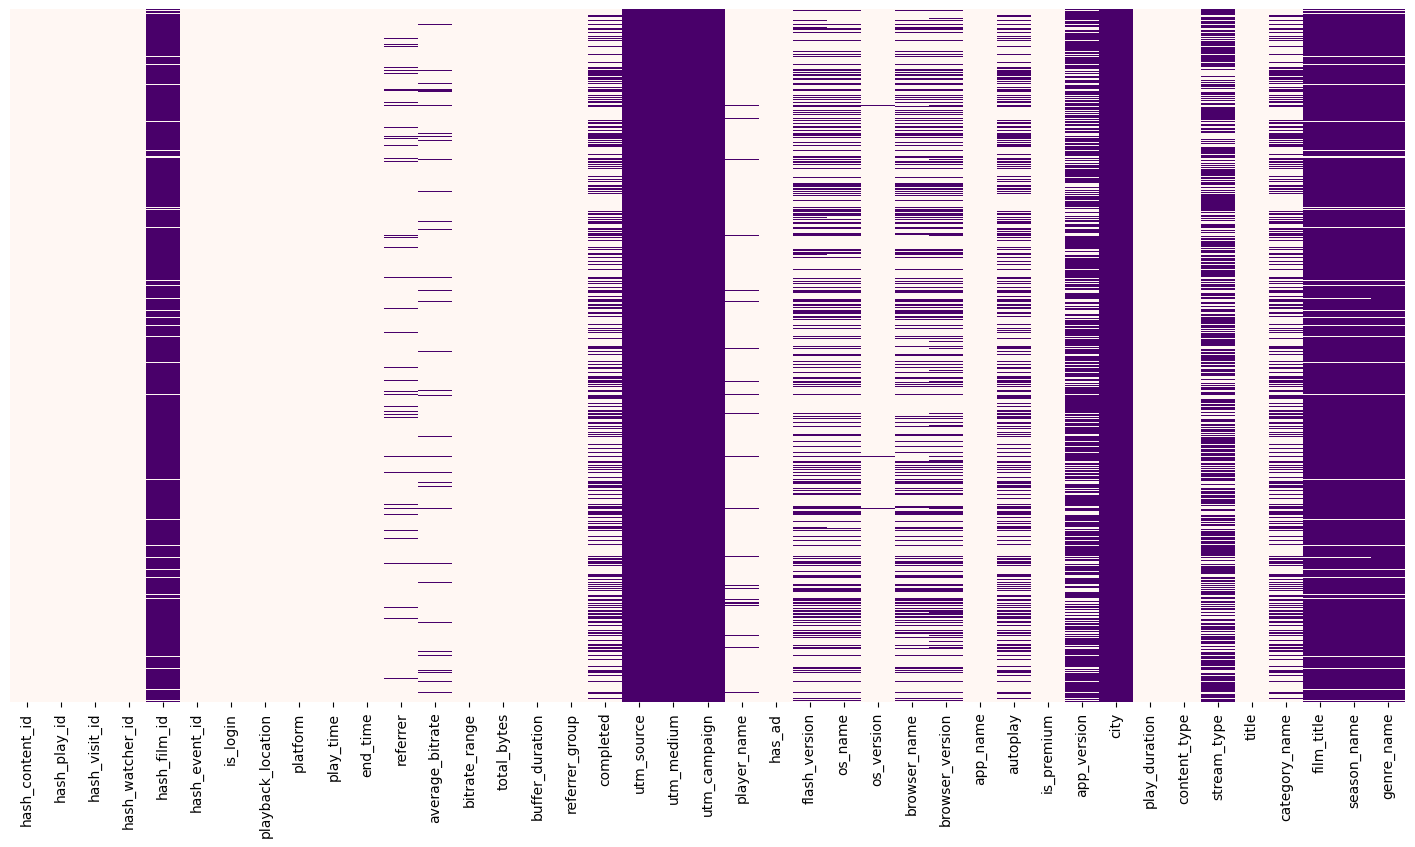

In [149]:
#Heatmap for missing values
# Visualize the missing values
plt.figure(figsize=(18, 9))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='RdPu')
plt.show()

In [150]:
# drop id and empty column or column with more than 5% missing data
df.drop(['hash_content_id', 'hash_play_id', 'hash_visit_id','hash_watcher_id', 'hash_film_id','hash_event_id','utm_source', 
         'utm_medium','utm_campaign','city','film_title','season_name','genre_name','app_version','stream_type','autoplay',
         'category_name','completed','browser_version','flash_version','os_name','browser_name'], axis=1, inplace=True)

# drop play and end time due to play_duration
#df.drop(['play_time', 'end_time'], axis=1, inplace=True)

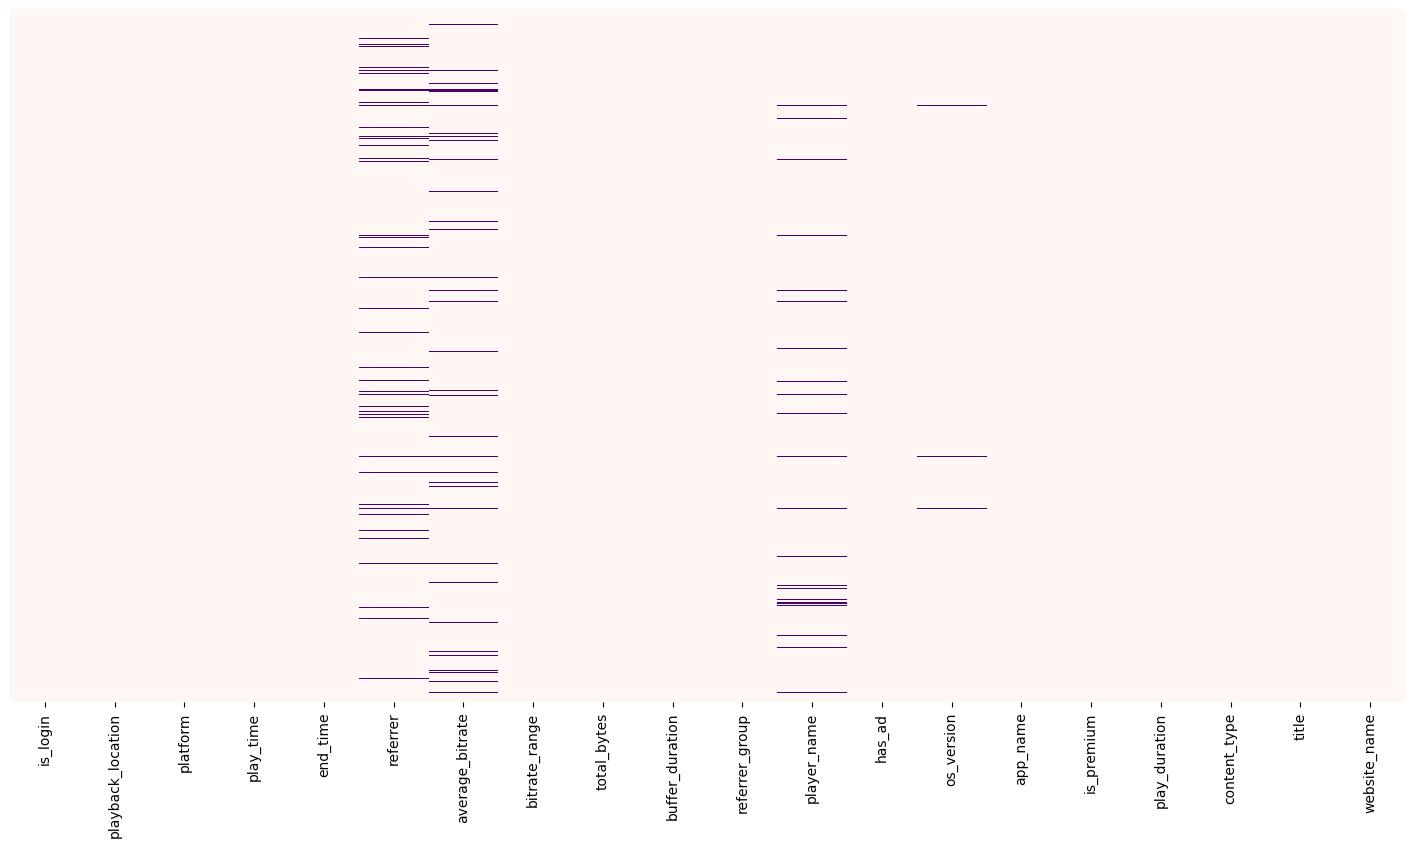

In [158]:
#Heatmap for missing values
# Visualize the missing values
plt.figure(figsize=(18, 9))
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='RdPu')
plt.show()

In [152]:
#duration by play time and end time
#df[['play_time', 'end_time']] = df[['play_time', 'end_time']].apply(pd.to_datetime)
#df['duration'] = df['end_time'] - df['play_time']

In [155]:
df['referrer'].fillna('none')

0         https://m.liputan6.com/bola/read/4169085/marc-...
1         https://m.bola.net/italia/lautaro-martinez-abs...
2         https://m.bola.net/italia/lautaro-martinez-abs...
3         https://m.liputan6.com/amp/4169313/jadwal-liga...
4         https://www.liputan6.com/bola/read/4169313/jad...
                                ...                        
106806                                           live index
106807                https://www.liputan6.com/showbiz/kpop
106808                              livestreaming watchpage
106809    https://m.bola.com/indonesia/read/4176791/shin...
106810                                        vod watchpage
Name: referrer, Length: 106811, dtype: object

In [157]:
revised_df['referrer'] = df['referrer'].fillna('none')

def extract_website_name(referrer):
    ext = tldextract.extract(referrer)
    #Combine domain and suffix to get the full website name
    return f"{ext.domain}.{ext.suffix}"

# Apply the function to the DataFrame
df['website_name'] = revised_df['referrer'].apply(extract_website_name)

In [ ]:
df.describe().T\
        .style.bar(subset=['mean'], color=px.colors.qualitative.G10[5])\
        .background_gradient(subset=['std'], cmap='Blues')\
        .background_gradient(subset=['75%'], cmap='BuGn')

,count,mean,std,min,25%,50%,75%,max
average_bitrate,101865.000000,199406.240230,141397.648431,144.000000,633.000000,300000.000000,300000.000000,300000.000000
total_bytes,106811.000000,77653417.448465,468361203.774299,0.000000,750.000000,506250.000000,11250000.000000,30920625000.000000
buffer_duration,106811.000000,227242.178958,74163471.625123,0.000000,0.000000,1.000000,6.000000,24238070461.000000
play_duration,106811.000000,425.431847,1541.638614,0.000000,4.000000,41.000000,120.000000,82455.000000


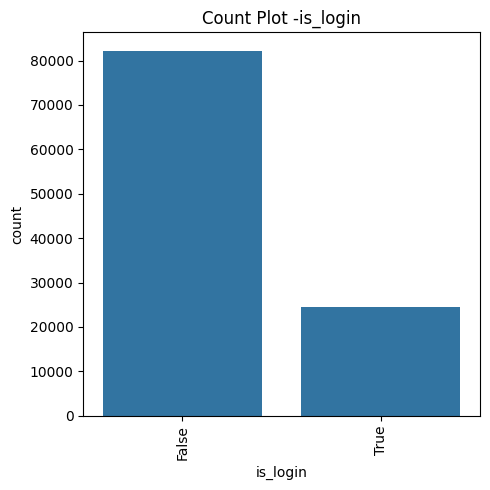

In [ ]:
v1 = 'is_login'

plt.figure(figsize = (5,5))

#Box plot
plt.subplot(1, 1, 1)
sns.countplot(x=v1, data=df,order = df[v1].value_counts().index)
plt.title(f'Count Plot -{v1}')
plt.xticks(rotation = 90)

#adjust layout
plt.tight_layout()

#Show the plots
plt.show()

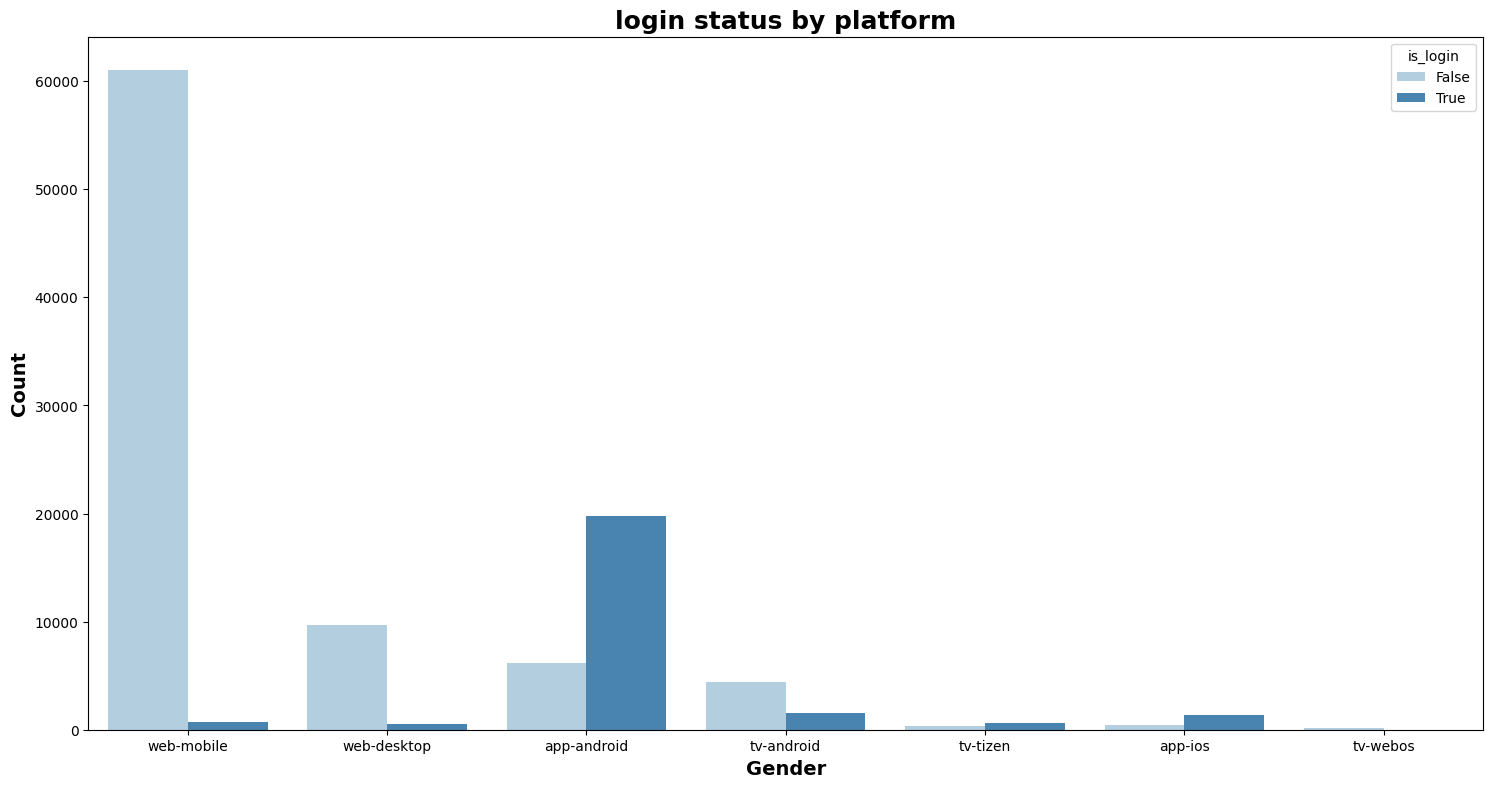

In [ ]:
#Gender of Students by Test Preparation Course
# Group the DataFrame by 'gender' and 'test_preparation_course', and count the occurrences
gn = df.groupby('platform')['is_login'].value_counts()

# Set up the figure for plotting
plt.figure(figsize=(18, 9))

# Create a count plot with seaborn, grouping by 'gender' and coloring by 'test_preparation_course'
sns.countplot(x='platform', hue='is_login', data=df, palette='Blues')

# Set the title of the plot
plt.title('login status by platform', fontdict={'size': 18, 'color': 'black', 'weight': 'bold'})

# Set labels for x-axis and y-axis
plt.xlabel('Gender', fontdict={'size': 14, 'color': 'black', 'weight': 'bold'})
plt.ylabel('Count', fontdict={'size': 14, 'color': 'black', 'weight': 'bold'})

# Display the plot
plt.show()

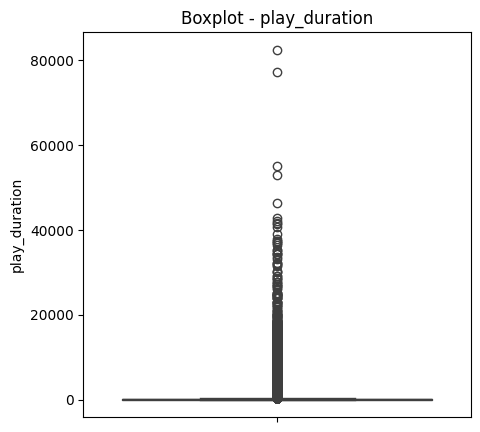

In [ ]:
n1 = 'play_duration'

plt.figure(figsize = (5,5))

#Box plot
sns.boxplot(y = n1, data=df)
plt.title(f'Boxplot - {n1}')


#Show the plots
plt.show()

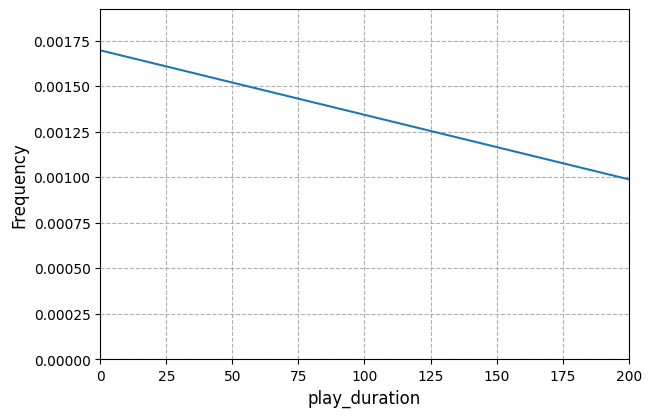

In [ ]:
plt.figure(figsize = (15,10))

plt.subplot(2, 2, 1)
sns.kdeplot(data = df['play_duration'])
plt.xlim([0,200])  
plt.xlabel("play_duration", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=1, linestyle="--")     
  
plt.show()

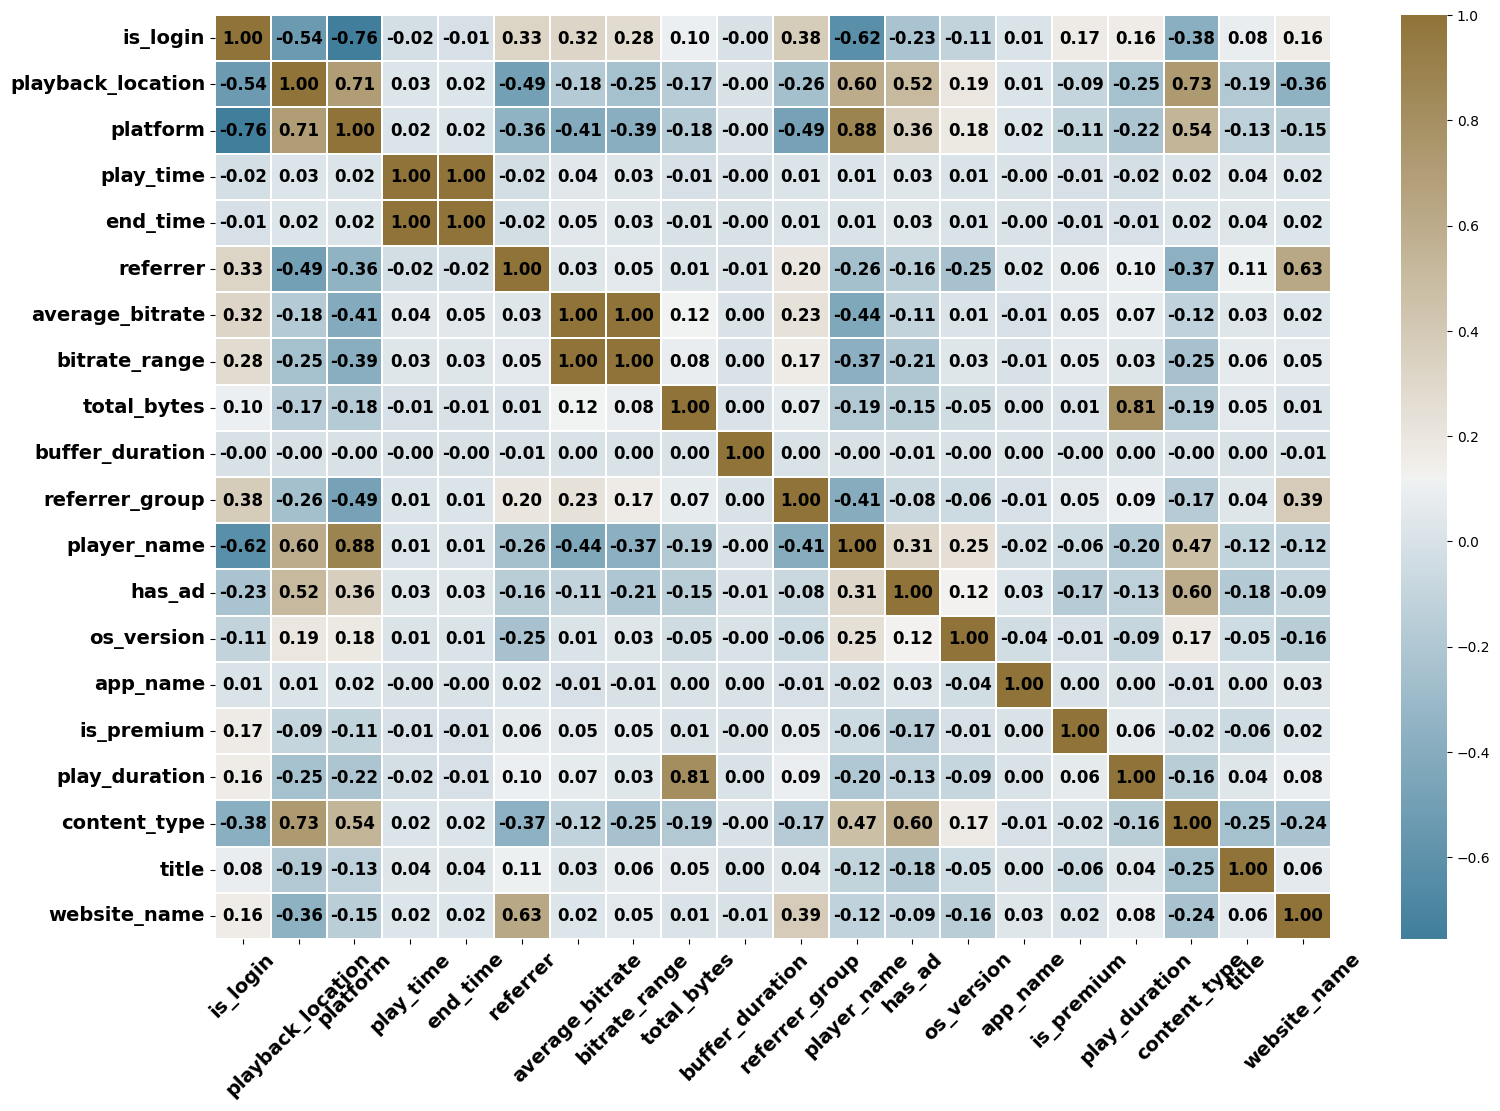

In [ ]:
#Heatmap for correlation

# Initialize LabelEncoder object
label_encode = LabelEncoder()

# Create a copy of the DataFrame
df2 = df.copy()

# Iterate over columns in DataFrame
for i in df2.columns:
    # If column type is 'object', encode it using LabelEncoder
    if df2[i].dtype == 'object':
        df2[i] = LabelEncoder().fit_transform(df2[i])

# Plot correlation heatmap of modified DataFrame
plt.figure(figsize=(18, 12), facecolor='none')
sns.heatmap(
    df2.corr(),
    cmap=sns.diverging_palette(230, 60, as_cmap=True),
    annot=True,
    linewidths=0.2,
    annot_kws={'size': 12, 'weight': 'bold', 'color': 'black'},
    fmt='.2f',
)
plt.xticks(fontsize=14, weight='bold', rotation=45)
plt.yticks(fontsize=14, weight='bold')
plt.show()